<a href="https://colab.research.google.com/github/TeoGM97/Clasificacion-Binaria/blob/master/Clasificacion_binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

Vamos a descargar los datos del dataset de keras.

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


Keras nos facilita la conversion de las palabras a numeros, como se puede ver a continuacion.

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

Para ver las palabras con su numero:

In [ ]:
word_index = imdb.get_word_index()


1641221/1641221 [==============================] - 0s 0us/step


Estructura: palabra: numero.
Queremos cambiar el orden de eso para poder trabajarlo mejor. Lo haremos volviendo word index en un diccionario value key. Iterando para key y value cuando key y value esten en word index.

In [ ]:
word_index = dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
word_index

A continuacion, obtendremos las palabras que representan los numeros. La variable puede ser cualquiera. La llamaremos _
Los primeros 3 indices son palabras reservadas.

In [ ]:
for _ in train_data[0]:
  print(word_index.get (_ -3))

Vamos a crear el set de datos. Pero antes debemos tener en cuenta que Keras solo recibe tensores. Solo se maneja con numeros de coma flotante. 
Los datos en train_data no tienen una estructura, son simplemente numeros equivalentes a palabras, uno tras otro. Lo que vamos a hacer es vectorizar:

In [ ]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i, sequences]=1
  return results

In [ ]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

Despues de lo anterior. Tendremos una forma de 25k ejemplos en una estructura de 10k que son las palabras. Solo vendra 1 cuando la palabra existe.
Ahora volveremos a y a numero flotante

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(train_labels).astype('float32')

Ahora nos queda hacer el modelo:
Vamos a usar la funcion de perdida binary cross entrophy. Funcion recomendada para clasificacion binaria

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16 , activation = 'relu', input_shape = (10000, ))) #16 neuronas. Relu. Entrada de 10k porque son 10k los ejemplos
model.add(layers.Dense(16 , activation = 'relu'))
model.add(layers.Dense(1 , activation = 'sigmoid')) #1 sola neurona que diga si es 0 o 1

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

 A continuacion sigue el entrenamiento. Esta vez tendramos x_val que es la x de validacion.

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[10000:]

y_val = y_train[:1000]
partial_y_train = y_train[10000:]

Entrenamiento:

In [ ]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Vamos a validar los resultados

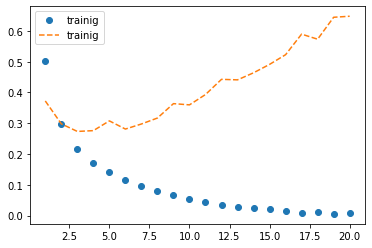

In [ ]:
import matplotlib.pyplot as plt

history_dictr = history.history
loss_values = history_dictr['loss']
val_loss_values = history_dictr['val_loss']

epoch = range(1,len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'trainig')
plt.plot(epoch, val_loss_values, '--', label = 'trainig')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 4.8660 - accuracy: 0.4984


[4.865965366363525, 0.4983600080013275]

El **overfiting** es un problema comun en la redes neuronales y se trata basicamente que el modelo se aprendió los datos.

Hay 3 principales maneras para combatir esto: Un modelo mas pequeño, regularizacion y capas Dropout.

La **regularización** se trata de que entre dos soluciones, la mas simple es la que debemos elegir.

Para este caso queremos reducir la complejidad del modelo, reduciendo los pesos que arroja la red, para que sea mas facil de procesar y menos compleja.

La regularizacion le da mas peso a la funcion de costo, para así castigue mas.
Hay 2 tipos: L1 que funciona con los valores absolutos de los pesos de la neurona. Estos se suman a la funcion de costo, castigandola.
La L2 los eleva al cuadrado.
Ambos tienen un delta que va a ayudar con ese castigo. 

El **Dropout** es otra manera de combatir este overfing. Se trata de apagar ciertos valores o neuronas en cada iteracion de manera aleatoria. Asi cada neurona dependera menos de las anteriores y evitaremos la "conspiracion" y asi el overfiting


Modelo menos complejo

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(4 , activation = 'relu', input_shape = (10000, )))
model2.add(layers.Dense(4 , activation = 'relu'))
model2.add(layers.Dense(1 , activation = 'sigmoid'))

model2.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

history2 = model2.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

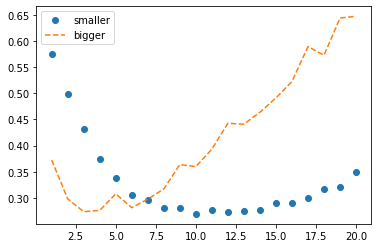

In [ ]:
history_dictr = history.history
loss_values = history_dictr['loss']
val_loss_values = history_dictr['val_loss']
val_loss_values_2 = history2.history['val_loss']

epoch = range(1,len(loss_values) + 1)
plt.plot(epoch, val_loss_values_2, 'o', label = 'smaller')
plt.plot(epoch, val_loss_values, '--', label = 'bigger')
plt.legend()
plt.show()

Regularizacion

In [ ]:
from keras import regularizers

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(16 , activation = 'relu', input_shape = (10000, ), 
                        kernel_regularizer = regularizers.l2(0.001)))
model3.add(layers.Dense(16 , activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model3.add(layers.Dense(1 , activation = 'sigmoid'))

model3.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

history3 = model3.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

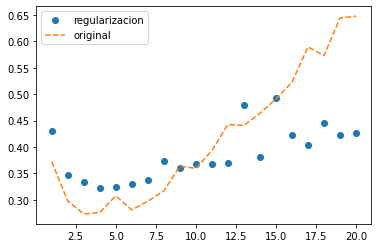

In [ ]:
history_dictr = history.history
loss_values = history_dictr['loss']
val_loss_values = history_dictr['val_loss']
val_loss_values_3 = history3.history['val_loss']

epoch = range(1,len(loss_values) + 1)
plt.plot(epoch, val_loss_values_3, 'o', label = 'regularizacion')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()

Dropout.

Esta es una capa, no un modelo

In [ ]:
model4 = models.Sequential()
model4.add(layers.Dense(4 , activation = 'relu', input_shape = (10000, )))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(4 , activation = 'relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1 , activation = 'sigmoid'))

model4.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

history4 = model4.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

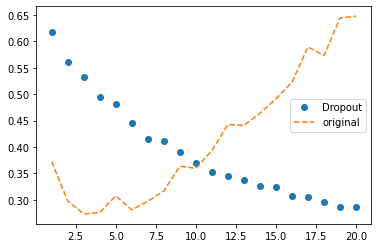

In [ ]:
history_dictr = history.history
loss_values = history_dictr['loss']
val_loss_values = history_dictr['val_loss']
val_loss_values_4 = history4.history['val_loss']

epoch = range(1,len(loss_values) + 1)
plt.plot(epoch, val_loss_values_4, 'o', label = 'Dropout')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()